# EDA

In [1]:
import pandas as pd

df = pd.read_csv("/Users/renat/Documents/study/dwv/project/nvd_raw_data_2025-03-09.csv")
print(df.head())


   Unnamed: 0         cve_id           published_date  \
0           0  CVE-1999-0095  1988-10-01T04:00:00.000   
1           1  CVE-1999-0082  1988-11-11T05:00:00.000   
2           2  CVE-1999-1471  1989-01-01T05:00:00.000   
3           3  CVE-1999-1122  1989-07-26T04:00:00.000   
4           4  CVE-1999-1467  1989-10-26T04:00:00.000   

        last_modified_date vuln_status  \
0  2024-11-20T23:27:50.607    Modified   
1  2024-11-20T23:27:48.337    Modified   
2  2024-11-20T23:31:11.753    Modified   
3  2024-11-20T23:30:21.757    Modified   
4  2024-11-20T23:31:11.203    Modified   

                                         description  cvss_v2_base_score  \
0  The debug command in Sendmail is enabled, allo...                10.0   
1      CWD ~root command in ftpd allows root access.                10.0   
2  Buffer overflow in passwd in BSD based operati...                 7.2   
3  Vulnerability in restore in SunOS 4.0.3 and ea...                 4.6   
4  Vulnerability in rcp 

In [2]:
# Check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284577 entries, 0 to 284576
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      284577 non-null  int64  
 1   cve_id                          284577 non-null  object 
 2   published_date                  284577 non-null  object 
 3   last_modified_date              284577 non-null  object 
 4   vuln_status                     284577 non-null  object 
 5   description                     284577 non-null  object 
 6   cvss_v2_base_score              185623 non-null  float64
 7   cvss_v2_access_vector           185623 non-null  object 
 8   cvss_v2_access_complexity       185623 non-null  object 
 9   cvss_v2_authentication          185623 non-null  object 
 10  cvss_v2_confidentiality_impact  185623 non-null  object 
 11  cvss_v2_integrity_impact        185623 non-null  object 
 12  cvss_v2_availabi

In [3]:
# Convert date columns to datetime format
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['last_modified_date'] = pd.to_datetime(df['last_modified_date'], errors='coerce')

# Replace 'NONE' strings with actual NaN for easier processing
df.replace("NONE", pd.NA, inplace=True)
df.replace("nan", pd.NA, inplace=True)
df.replace("<NA>", pd.NA, inplace=True)

In [4]:
missing_values = df.isna().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 cvss_v2_base_score                 98954
cvss_v2_access_vector              98954
cvss_v2_access_complexity          98954
cvss_v2_authentication            251800
cvss_v2_confidentiality_impact    160015
cvss_v2_integrity_impact          153412
cvss_v2_availability_impact       166367
cvss_v2_severity                   98954
cvss_v2_exploitability_score       98954
cvss_v2_impact_score               98954
cvss_v3_base_score                133546
cvss_v3_severity                  133562
cvss_v3_vector                    133546
cvss_v3_attack_vector             133546
cvss_v3_attack_complexity         133546
cvss_v3_privileges_required       215950
cvss_v3_user_interaction          234156
cvss_v3_scope                     133546
cvss_v3_confidentiality_impact    169289
cvss_v3_integrity_impact          179038
cvss_v3_availability_impact       191872
cvss_v3_exploitability_score      133546
cvss_v3_impact_score              133546
cwe_str                            20309

In [5]:
# Replace missing references with empty string (to avoid issues in text processing)
df['references_str'].fillna("", inplace=True)


/var/folders/sw/x_fx70kn58qglhxh3pt7cfbr0000gn/T/ipykernel_64855/2447118919.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['references_str'].fillna("", inplace=True)


In [6]:
# Create a new column that uses CVSS v3 if available, otherwise CVSS v2
df['cvss_score'] = df['cvss_v3_base_score'].fillna(df['cvss_v2_base_score'])
df['cvss_severity'] = df['cvss_v3_severity'].fillna(df['cvss_v2_severity'])

In [7]:
for col in ['cvss_v2_access_vector', 'cvss_v3_attack_vector', 
            'cvss_v2_access_complexity', 'cvss_v3_attack_complexity', 
            'cvss_v2_authentication', 'cvss_v3_privileges_required', 
            'cvss_v2_confidentiality_impact', 'cvss_v3_confidentiality_impact', 
            'cvss_v2_severity', 'cvss_v3_severity']:
    print(f"{col}: {df[col].dropna().unique()}")

cvss_v2_access_vector: ['NETWORK' 'LOCAL' 'ADJACENT_NETWORK']
cvss_v3_attack_vector: ['LOCAL' 'NETWORK' 'ADJACENT_NETWORK' 'PHYSICAL']
cvss_v2_access_complexity: ['LOW' 'HIGH' 'MEDIUM']
cvss_v3_attack_complexity: ['LOW' 'HIGH']
cvss_v2_authentication: ['SINGLE' 'MULTIPLE']
cvss_v3_privileges_required: ['LOW' 'HIGH']
cvss_v2_confidentiality_impact: ['COMPLETE' 'PARTIAL']
cvss_v3_confidentiality_impact: ['HIGH' 'LOW']
cvss_v2_severity: ['HIGH' 'MEDIUM' 'LOW']
cvss_v3_severity: ['HIGH' 'CRITICAL' 'MEDIUM' 'LOW']


In [8]:
categorical_columns = [
    'cvss_v2_access_vector', 'cvss_v3_attack_vector', 
    'cvss_v2_access_complexity', 'cvss_v3_attack_complexity', 
    'cvss_v2_authentication', 'cvss_v3_privileges_required', 
    'cvss_v2_confidentiality_impact', 'cvss_v3_confidentiality_impact', 
    'cvss_v2_severity', 'cvss_v3_severity'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

In [9]:
df_v2 = df[df['cvss_v2_base_score'].notna()]
df_v3 = df[df['cvss_v3_base_score'].notna()]

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284577 entries, 0 to 284576
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unnamed: 0                      284577 non-null  int64         
 1   cve_id                          284577 non-null  object        
 2   published_date                  284577 non-null  datetime64[ns]
 3   last_modified_date              284577 non-null  datetime64[ns]
 4   vuln_status                     284577 non-null  object        
 5   description                     284577 non-null  object        
 6   cvss_v2_base_score              185623 non-null  float64       
 7   cvss_v2_access_vector           185623 non-null  category      
 8   cvss_v2_access_complexity       185623 non-null  category      
 9   cvss_v2_authentication          32777 non-null   category      
 10  cvss_v2_confidentiality_impact  124562 non-null  categor

In [11]:
print(df['cvss_v2_integrity_impact'].unique())
print(df['cvss_v2_availability_impact'].unique())
print(df['cvss_v3_integrity_impact'].unique())
print(df['cvss_v3_availability_impact'].unique())


['COMPLETE' 'PARTIAL' <NA> nan]
['COMPLETE' 'PARTIAL' <NA> nan]
[nan 'HIGH' <NA> 'LOW']
[nan 'HIGH' <NA> 'LOW']


In [12]:
df[['cve_id', 'cvss_v2_base_score', 'cvss_v3_base_score']].sort_values(by='cvss_v3_base_score', ascending=False).head(10)

,cve_id,cvss_v2_base_score,cvss_v3_base_score
189507,CVE-2022-1518,7.5,10.0
167011,CVE-2021-33032,10.0,10.0
217894,CVE-2023-34157,NaN,10.0
267229,CVE-2024-50498,NaN,10.0
236818,CVE-2024-23613,9.3,10.0
246269,CVE-2024-28185,NaN,10.0
216315,CVE-2023-33189,NaN,10.0
230689,CVE-2023-31273,NaN,10.0
229733,CVE-2023-25960,NaN,10.0
161768,CVE-2021-2256,7.5,10.0


In [13]:
stats_table = df[['cvss_v2_base_score', 'cvss_v3_base_score', 'cvss_score']]
print(stats_table)

        cvss_v2_base_score  cvss_v3_base_score  cvss_score
0                     10.0                 NaN        10.0
1                     10.0                 NaN        10.0
2                      7.2                 NaN         7.2
3                      4.6                 NaN         4.6
4                     10.0                 NaN        10.0
...                    ...                 ...         ...
284572                 4.0                 3.5         3.5
284573                 4.0                 3.5         3.5
284574                 4.0                 4.3         4.3
284575                 6.5                 6.3         6.3
284576                 5.0                 4.3         4.3

[284577 rows x 3 columns]


In [14]:
print(df['cvss_v3_attack_vector'].value_counts())

cvss_v3_attack_vector
NETWORK             108482
LOCAL                36130
ADJACENT_NETWORK      4774
PHYSICAL              1645
Name: count, dtype: int64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

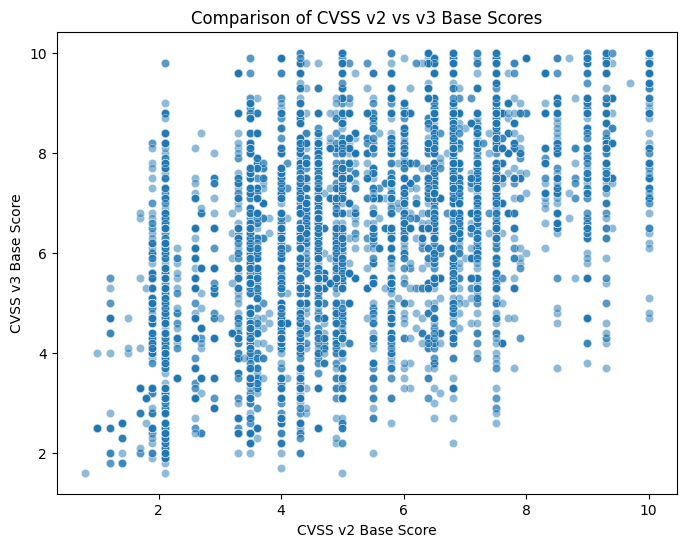

In [16]:
df_both = df[df['cvss_v2_base_score'].notna() & df['cvss_v3_base_score'].notna()]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='cvss_v2_base_score', 
    y='cvss_v3_base_score', 
    data=df_both, 
    alpha=0.5
)
plt.title("Comparison of CVSS v2 vs v3 Base Scores")
plt.xlabel("CVSS v2 Base Score")
plt.ylabel("CVSS v3 Base Score")
plt.show()


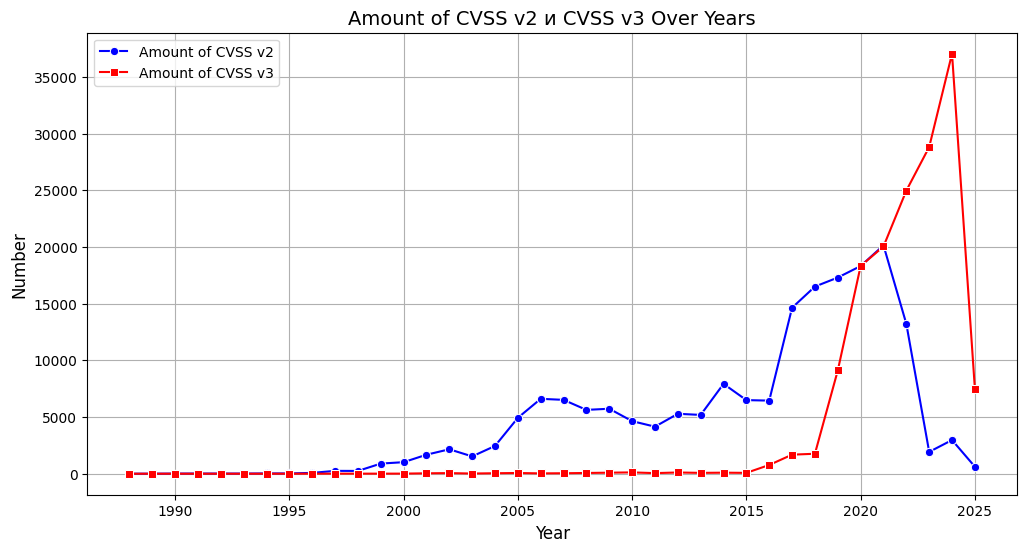

In [17]:
df['year'] = df['published_date'].dt.year
cvss_v3_count = df.groupby("year")["cvss_v3_base_score"].count()
cvss_v2_count = df.groupby("year")["cvss_v2_base_score"].count()

plt.figure(figsize=(12, 6))
sns.lineplot(x=cvss_v2_count.index, y=cvss_v2_count.values, marker="o", label="Amount of CVSS v2", color="blue")
sns.lineplot(x=cvss_v3_count.index, y=cvss_v3_count.values, marker="s", label="Amount of CVSS v3", color="red")

plt.title("Amount of CVSS v2 и CVSS v3 Over Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


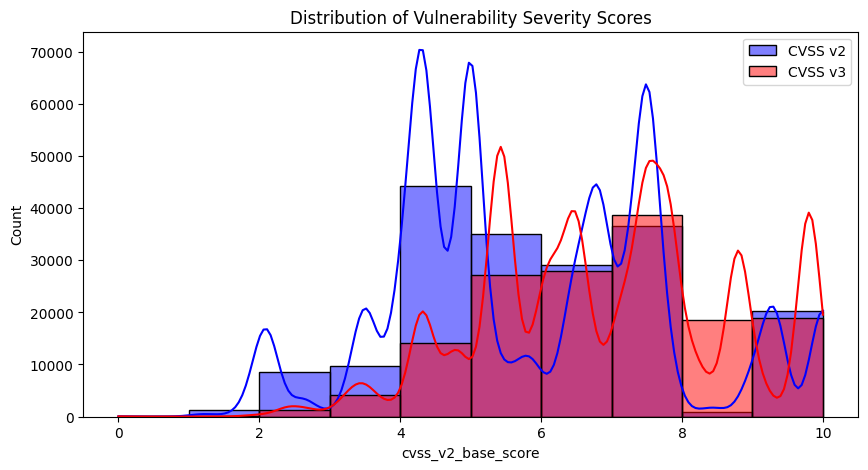

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df['cvss_v2_base_score'], bins=10, kde=True, color="blue", label="CVSS v2")
sns.histplot(df['cvss_v3_base_score'], bins=10, kde=True, color="red", label="CVSS v3")
plt.legend()
plt.title("Distribution of Vulnerability Severity Scores")
plt.show()

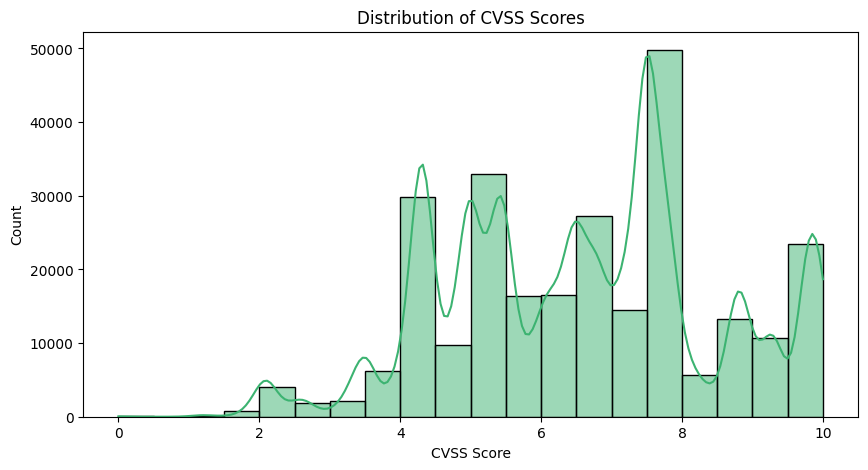

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['cvss_score'], bins=20, kde=True, color="mediumseagreen")
plt.xlabel('CVSS Score')
plt.ylabel('Count')
plt.title('Distribution of CVSS Scores')
plt.show()

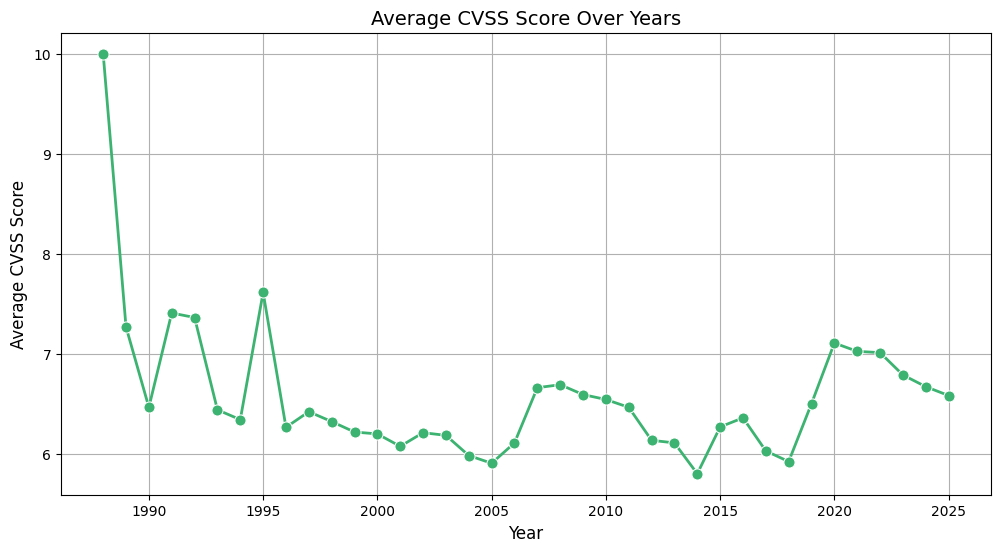

In [20]:
cvss_by_year = df.groupby('year')['cvss_score'].mean().dropna()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x=cvss_by_year.index, 
    y=cvss_by_year.values, 
    marker='o', 
    color="mediumseagreen", 
    linewidth=2, 
    markersize=8
)

plt.title("Average CVSS Score Over Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average CVSS Score", fontsize=12)
plt.grid(True)
plt.show()

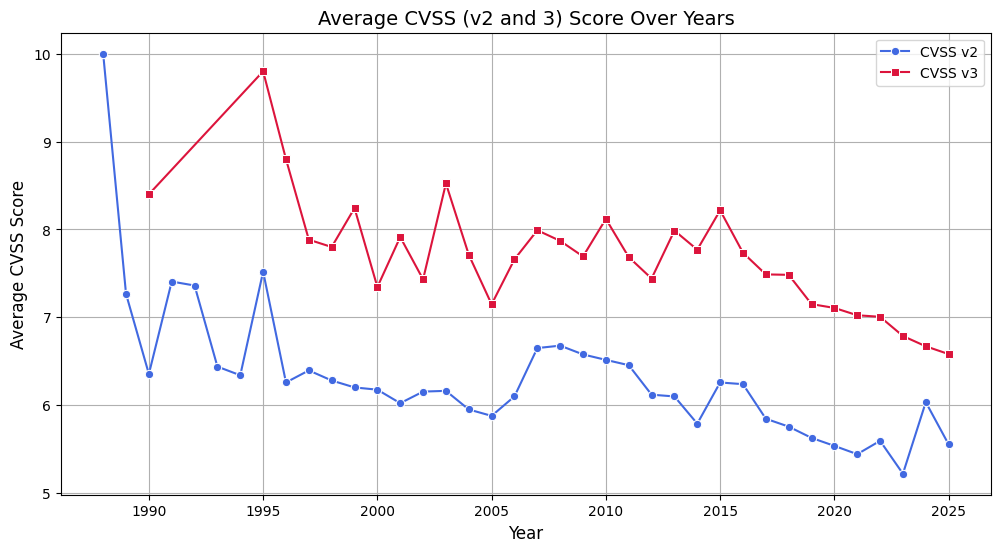

In [21]:
cvss_v2_by_year = df.groupby('year')['cvss_v2_base_score'].mean().dropna()
cvss_v3_by_year = df.groupby('year')['cvss_v3_base_score'].mean().dropna()

plt.figure(figsize=(12, 6))

sns.lineplot(x=cvss_v2_by_year.index, y=cvss_v2_by_year.values, marker='o', label="CVSS v2", color="royalblue")
sns.lineplot(x=cvss_v3_by_year.index, y=cvss_v3_by_year.values, marker='s', label="CVSS v3", color="crimson")

plt.title("Average CVSS (v2 and 3) Score Over Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average CVSS Score", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [22]:
cvss_summary = df.groupby("year")[["cvss_v2_base_score", "cvss_v3_base_score", "cvss_score"]].mean().round(2)
print(cvss_summary)

      cvss_v2_base_score  cvss_v3_base_score  cvss_score
year                                                    
1988               10.00                 NaN       10.00
1989                7.27                 NaN        7.27
1990                6.35                8.40        6.46
1991                7.41                 NaN        7.41
1992                7.36                 NaN        7.36
1993                6.44                 NaN        6.44
1994                6.34                 NaN        6.34
1995                7.52                9.80        7.61
1996                6.26                8.80        6.26
1997                6.40                7.88        6.42
1998                6.28                7.80        6.32
1999                6.20                8.24        6.22
2000                6.18                7.34        6.20
2001                6.02                7.91        6.07
2002                6.15                7.43        6.21
2003                6.16       

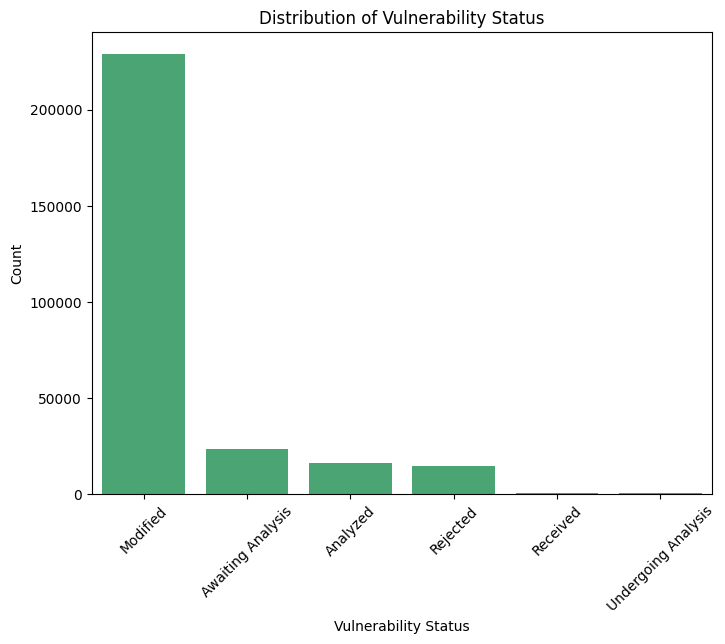

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(
    x='vuln_status', 
    data=df, 
    order=df['vuln_status'].value_counts().index,
    color="mediumseagreen"
)
plt.title("Distribution of Vulnerability Status")
plt.xlabel("Vulnerability Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


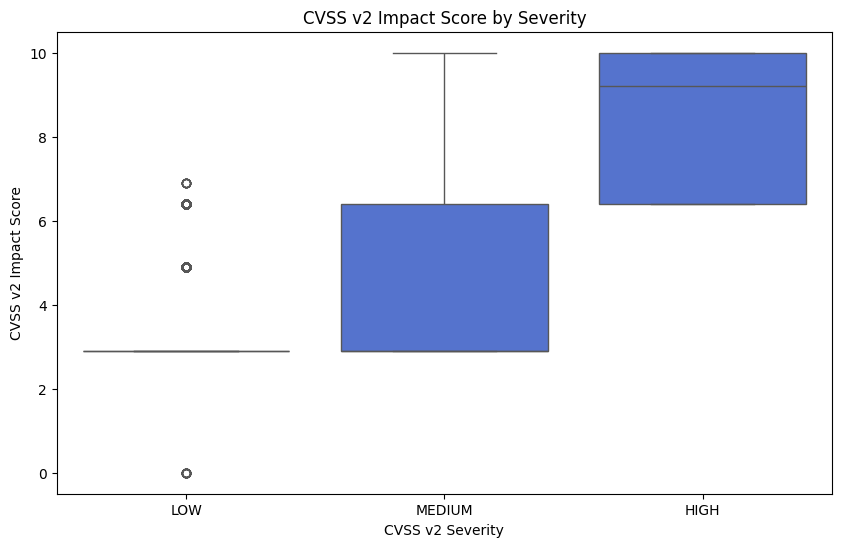

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cvss_v2_severity', y='cvss_v2_impact_score', data=df, order=['LOW', 'MEDIUM', 'HIGH'], color="royalblue")
plt.title('CVSS v2 Impact Score by Severity')
plt.xlabel('CVSS v2 Severity')
plt.ylabel('CVSS v2 Impact Score')
plt.show()


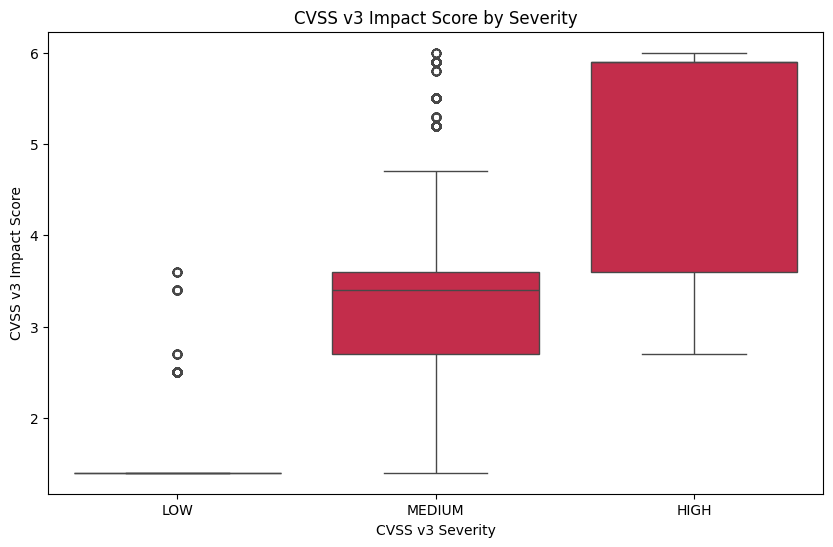

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cvss_v3_severity', y='cvss_v3_impact_score', data=df, order=['LOW', 'MEDIUM', 'HIGH'], color="crimson")
plt.title('CVSS v3 Impact Score by Severity')
plt.xlabel('CVSS v3 Severity')
plt.ylabel('CVSS v3 Impact Score')
plt.show()

/var/folders/sw/x_fx70kn58qglhxh3pt7cfbr0000gn/T/ipykernel_64855/750578808.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


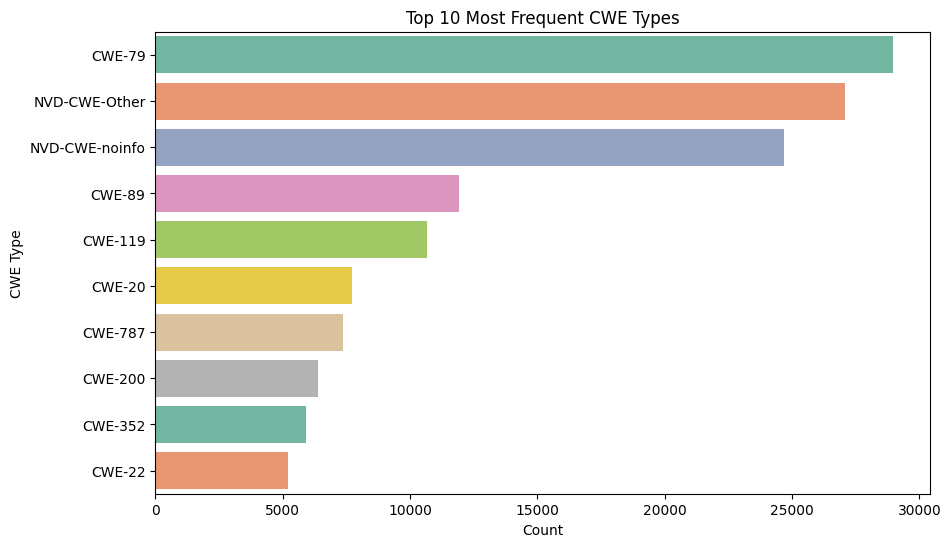

In [26]:
top_cwe = df['cwe_str'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_cwe.values, 
    y=top_cwe.index,
    palette="Set2"
)
plt.title("Top 10 Most Frequent CWE Types")
plt.xlabel("Count")
plt.ylabel("CWE Type")
plt.show()

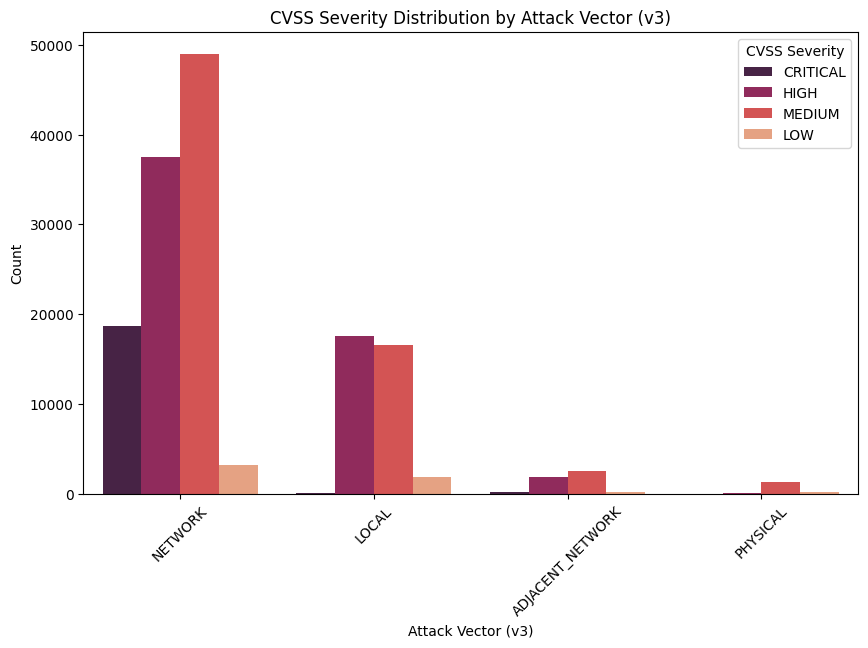

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(
    x='cvss_v3_attack_vector', 
    hue='cvss_v3_severity', 
    data=df,
    order=df['cvss_v3_attack_vector'].value_counts().index,
    hue_order=['CRITICAL', 'HIGH', 'MEDIUM', 'LOW'],
    palette=sns.color_palette("rocket", 4)
)
plt.title("CVSS Severity Distribution by Attack Vector (v3)")
plt.xlabel("Attack Vector (v3)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="CVSS Severity")
plt.show()
